<div align="center">
<font size="5">__Notebook for testing the reconstrcution of LST1 data.__</font>
<br><br>
<font size="4">This Notebook shows the steps followed within cta-lstchain to reconstruct event data from a corsika-simtelarray file to a dl2 data level, with reconstructed energy, direction and gamma/hadron separation.</font>
<font size="4">
To run this notebook you will need the last version of cta-lstchain:

git clone https://github.com/cta-observatory/cta-lstchain
<br>
<br>
**If you have ctapipe already installed in a conda environment:**
<br><br>
source activate cta-dev
<br>
python setup.py install
<br>
<font size="4">
**If you don't have ctapipe installed:**</font>
<br><br>
conda env create -f environment.yml
<br>
source activate cta-dev
<br>
python setup.py install

Also, you will need the datafiles from **cta-lstchain-extra:**

git clone https://github.com/misabelber/cta-lstchain-extra


<font size="4">
    **Some imports...**

In [27]:
from sklearn.externals import joblib
from ctapipe.utils import get_dataset_path
import matplotlib.pyplot as plt
import os
import pandas as pd
import lstchain.reco.dl0_to_dl1 as calib
import lstchain.reco.reco_dl1_to_dl2 as reco
import lstchain.visualization.plot_dl2 as lstplot
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 14

<font size="4">
**Import a simtelarray file of MC simulated data:**

In [2]:
try:
    datafile = "/home/queenmab/DATA/LST1/Gamma/gamma_20deg_0deg_run8___cta-prod3-lapalma-2147m-LaPalma-FlashCam.simtel.gz"
except:
    datafile = get_dataset_path('gamma_test_large.simtel.gz')

<font size="4">
**Calibration and parameters extraction**
    <br><br>
    We have a function for extracting all the image information:
    - Charge extraction
    - Cleaning
    - Hillas Parameters
    - Timing parameters

We store this information in a custom container which we write into a **hdf5** file.

In [3]:
calib.max_events = 1000 #Limit the number of events to analyze, to speed the examples
calib.r0_to_dl1(datafile)
output_filename = 'dl1_' + os.path.basename(datafile).split('.')[0] + '.h5'

0
100
200
300


/home/queenmab/GitHub/ctasoft/ctapipe/ctapipe/image/hillas.py:563: RuntimeWarning: invalid value encountered in sqrt
  width = np.sqrt((vy2 + vx2 - z) / 2.0)


400
500
600
700
800
900


<font size="4">
We can read this file as a **pandas dataframe**:

In [4]:
#Take a look at the parameters extracted from the simtelarray file:
data = pd.read_hdf(output_filename,key='events/LSTCam')
print(data.keys())

Index(['disp', 'event_id', 'gps_time', 'hadroness', 'intensity', 'intercept',
       'kurtosis', 'length', 'mc_alt', 'mc_alt_tel', 'mc_az', 'mc_az_tel',
       'mc_core_distance', 'mc_core_x', 'mc_core_y', 'mc_energy',
       'mc_h_first_int', 'mc_type', 'mc_x_max', 'obs_id', 'phi', 'psi', 'r',
       'skewness', 'src_x', 'src_y', 'time_gradient', 'width', 'wl', 'x', 'y'],
      dtype='object')


In [5]:
data

,disp,event_id,gps_time,hadroness,intensity,intercept,kurtosis,length,mc_alt,mc_alt_tel,...,psi,r,skewness,src_x,src_y,time_gradient,width,wl,x,y
0,0.707520,1400,1.443798e+09,0,1.967282,10.438069,1.681268,0.199899,1.22173,1.22173,...,-0.181568,0.707520,0.193187,4.143943e-13,-0.000003,-2.278065e+01,0.070155,0.350951,0.698586,-0.112082
1,1.043638,18107,1.443798e+09,0,1.901878,9.080282,2.068168,0.093137,1.22173,1.22173,...,1.827936,1.043635,-0.296870,4.143943e-13,-0.000003,1.936869e+01,0.058857,0.631937,-0.281611,1.004923
2,0.601066,20506,1.443798e+09,0,2.234512,9.421300,2.145217,0.169671,1.22173,1.22173,...,0.972096,0.601063,0.270332,4.143943e-13,-0.000003,1.538955e+00,0.084042,0.495324,0.177486,0.574260
3,0.507332,24504,1.443798e+09,0,1.505986,6.081994,2.382308,0.087603,1.22173,1.22173,...,-1.322655,0.507333,0.829826,4.143943e-13,-0.000003,3.041289e+01,0.047084,0.537471,0.473962,-0.180961
4,0.434686,26107,1.443798e+09,0,3.266183,11.002159,5.974878,0.283940,1.22173,1.22173,...,-0.610176,0.434685,-1.475461,4.143943e-13,-0.000003,4.466622e+00,0.274799,0.967803,0.394751,0.181996
5,0.328818,26808,1.443798e+09,0,3.153270,10.175876,2.371828,0.194474,1.22173,1.22173,...,-2.764007,0.328819,0.276238,4.143943e-13,-0.000003,3.450699e+00,0.094798,0.487458,-0.318498,-0.081738
6,0.518553,29402,1.443799e+09,0,1.605435,8.478377,2.222730,0.061503,1.22173,1.22173,...,2.175451,0.518550,0.677931,4.143943e-13,-0.000003,1.510626e+01,0.028761,0.467643,-0.230930,0.464291
7,0.298407,32303,1.443799e+09,0,1.659234,8.656216,2.188539,0.058331,1.22173,1.22173,...,-2.456045,0.298408,-0.479427,4.143943e-13,-0.000003,-3.992109e+01,0.047417,0.812889,-0.275756,-0.114043
8,0.329914,33907,1.443799e+09,0,1.622153,7.453701,2.665763,0.068280,1.22173,1.22173,...,-2.914363,0.329915,-0.005238,4.143943e-13,-0.000003,7.668361e+00,0.032597,0.477394,-0.304378,-0.127273
9,0.282005,34302,1.443799e+09,0,3.056564,10.482326,14.751332,0.434444,1.22173,1.22173,...,2.148932,0.282003,-1.397735,4.143943e-13,-0.000003,2.342227e+00,0.121921,0.280631,-0.075995,0.271570


<font size="4">
**We can take a look at some of these features...**
    <br><br>
    **Energy**

Text(0.5,0,'$log_{10} mcEnergy$ (MeV)')

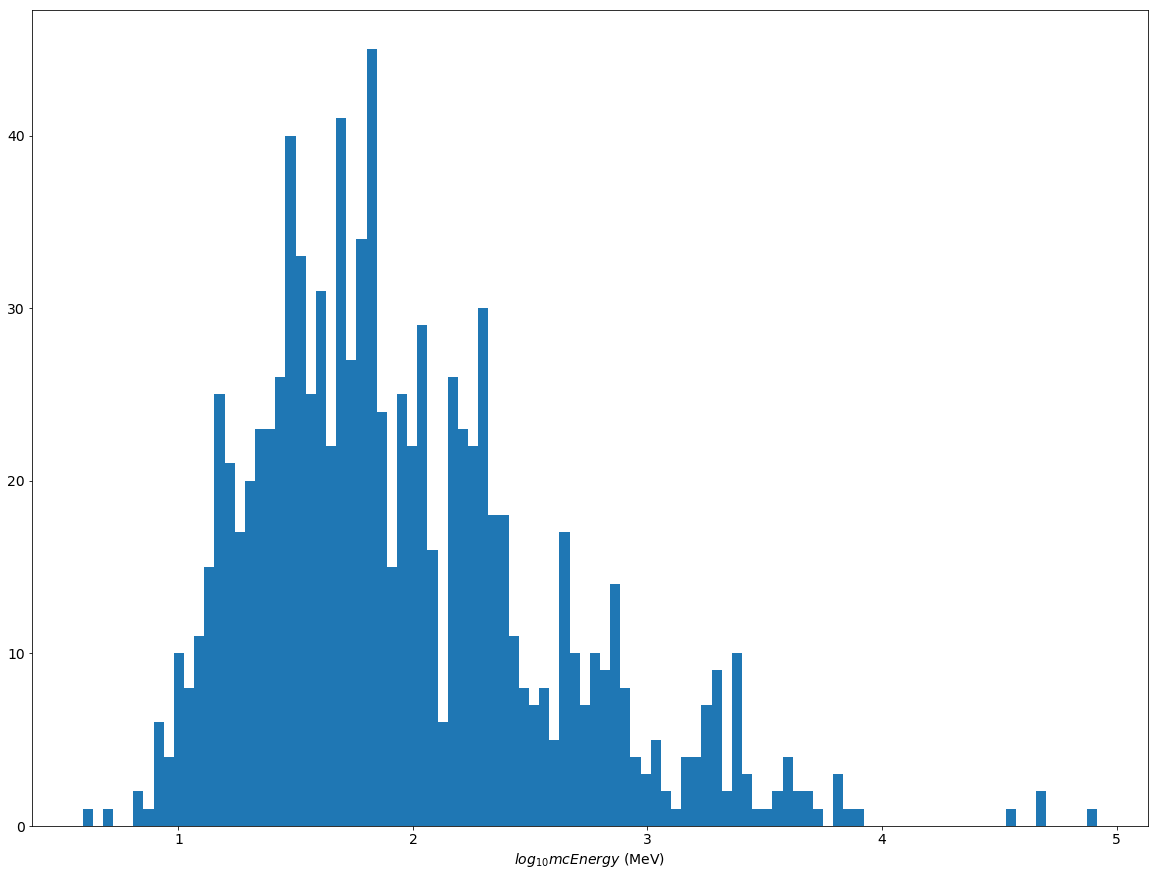

In [28]:
#We can plot some distributions:
plt.hist(data['mc_energy'],bins=100) #Log10(Energy) in MeV
plt.xlabel('$log_{10} mcEnergy$ (MeV)')

<font size="4">
**Intensity**

Text(0.5,0,'$log_{10} intensity$')

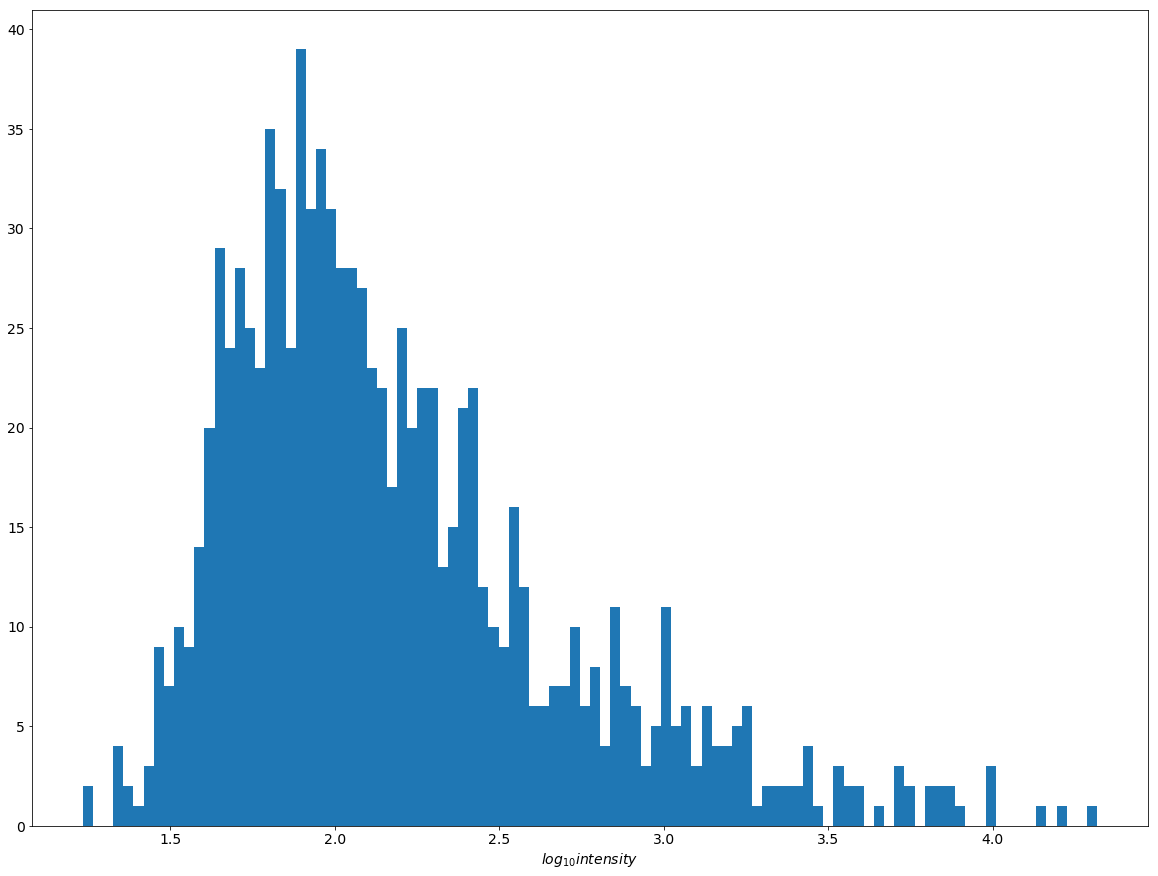

In [29]:
plt.hist(data['intensity'],bins=100) #Log10(intensity(size))
plt.xlabel('$log_{10} intensity$')

<font size="4">
**Width**

Text(0.5,0,'width (º)')

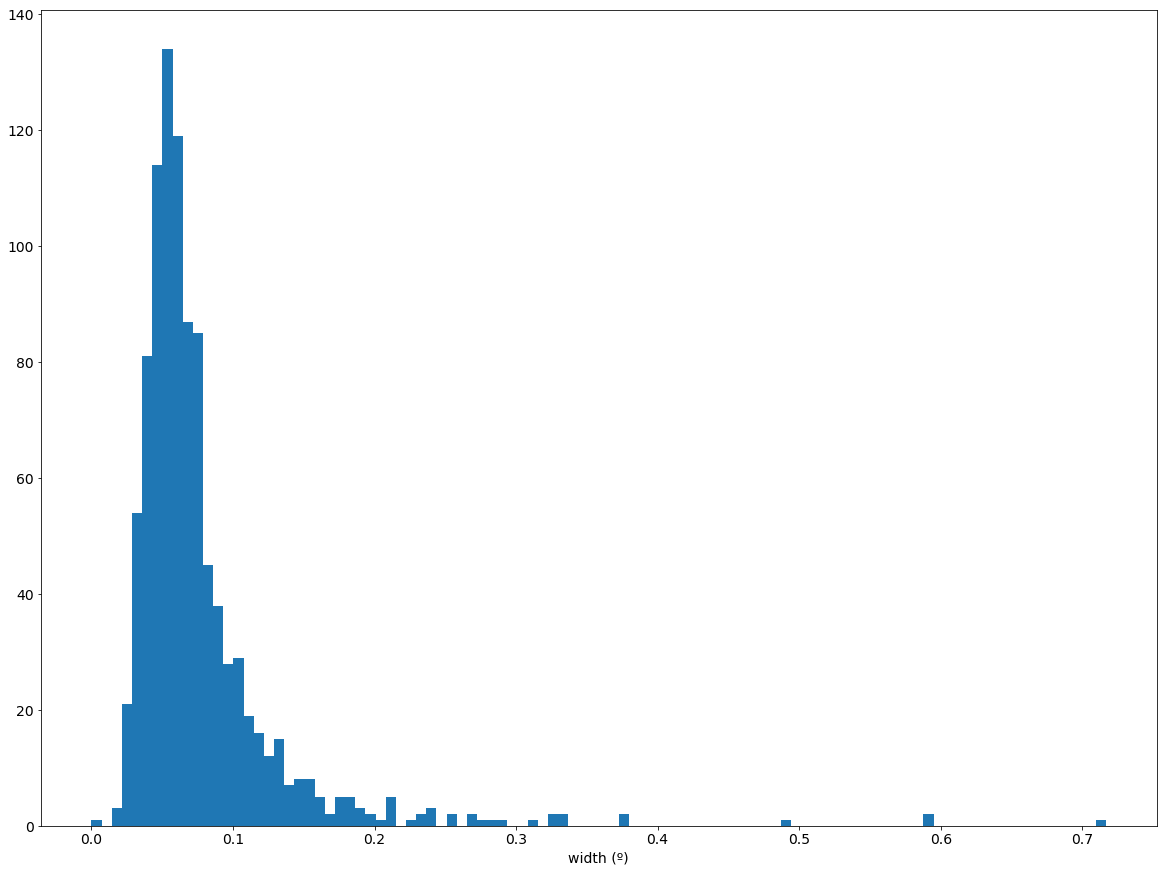

In [30]:
plt.hist(data['width'],bins=100) #Width in deg.
plt.xlabel('width (º)')

<font size="4">
**Length**

Text(0.5,0,'length (º)')

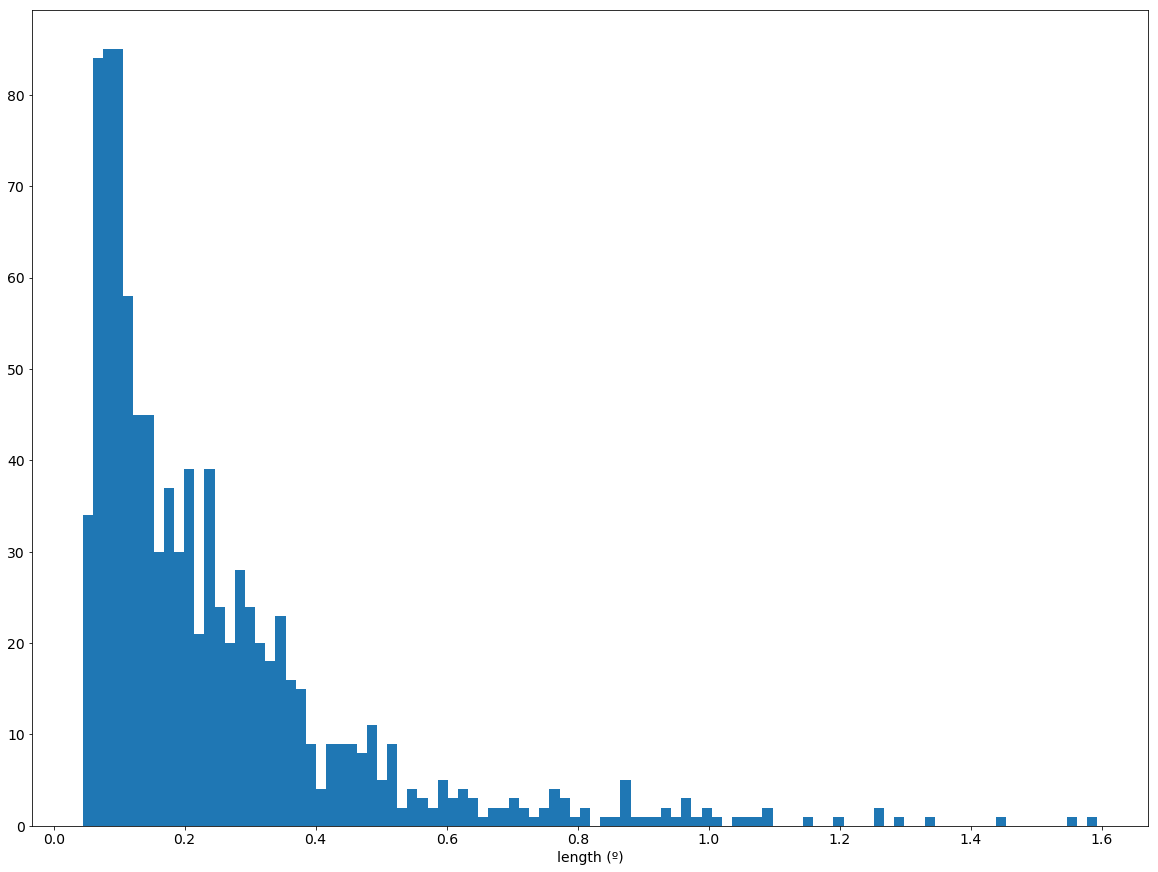

In [31]:
plt.hist(data['length'],bins=100) #Length in deg. 
plt.xlabel('length (º)')

<font size="4">
    **Source position in camera coordinates**

Text(0,0.5,'y (m)')

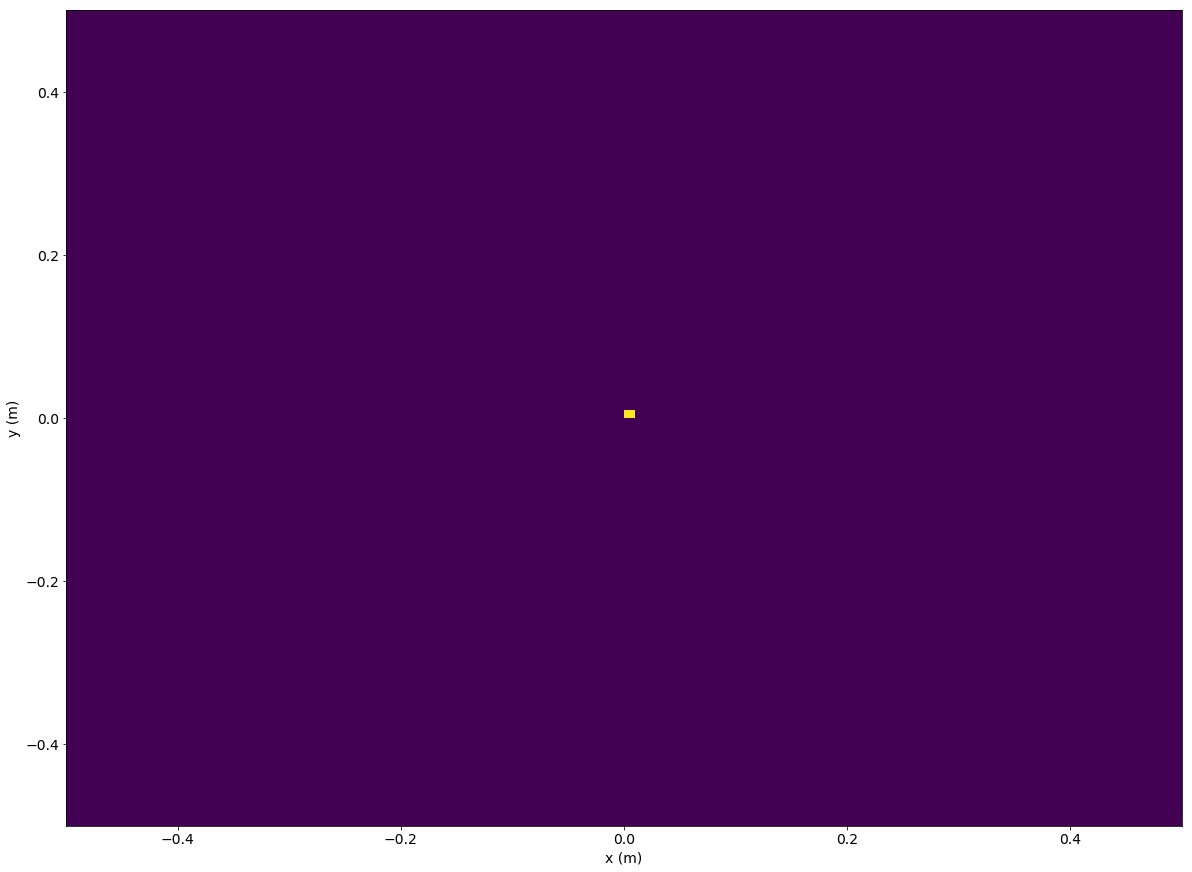

In [32]:
plt.hist2d(data['src_x'],data['src_y'],bins=100)
plt.xlabel('x (m)')
plt.ylabel('y (m)')

<font size="4">
**Cengter of gravity of Hillas ellipse in camera coordinates**

Text(0,0.5,'y (m)')

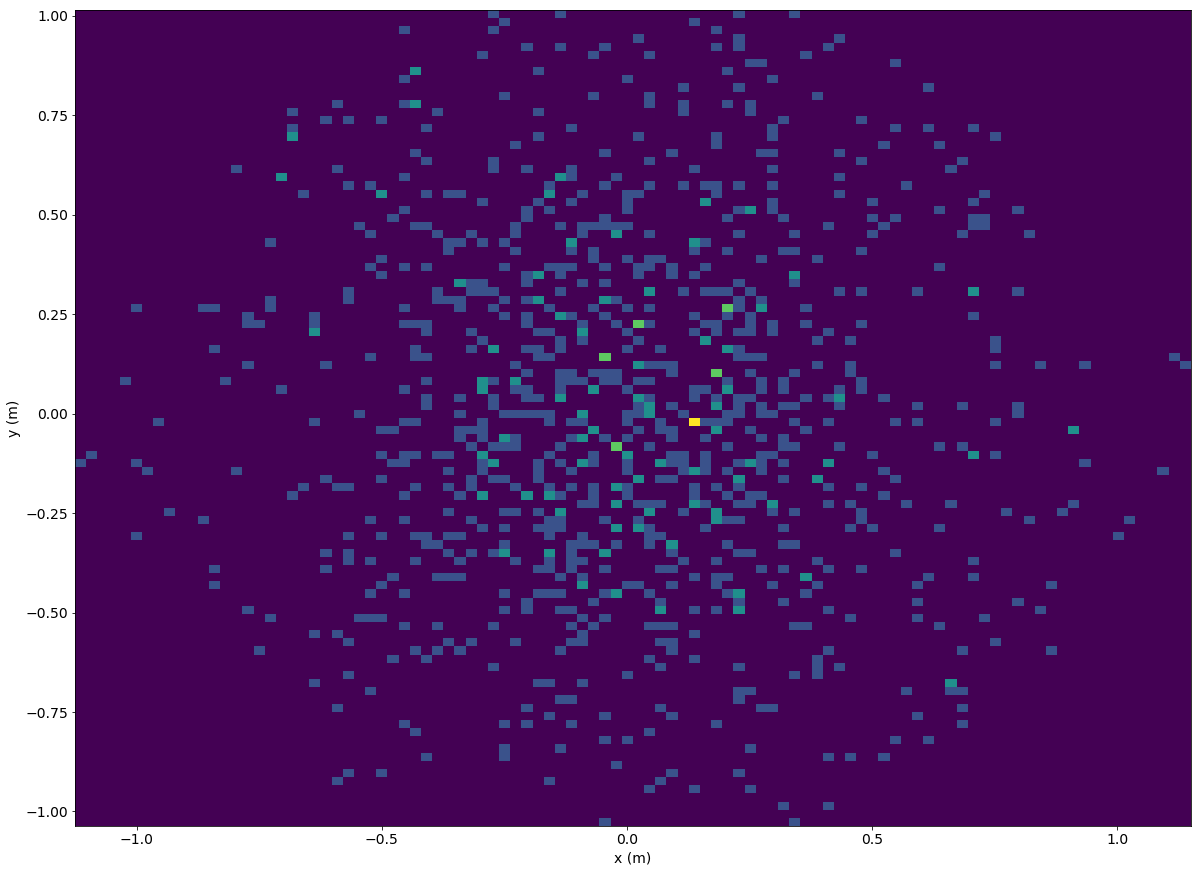

In [33]:
plt.hist2d(data['x'],data['y'],bins=100)
plt.xlabel('x (m)')
plt.ylabel('y (m)')

<font size="4">
**Import the Random Forests previously trained**

In [34]:
from sklearn.externals import joblib

try:
    path_models = "/home/queenmab/DATA/LST1/Models"

    fileE = path_models + "/RFreg_Energy.sav"                                                            
    fileD = path_models + "/RFreg_Disp.sav"                                                              
    fileH = path_models + "/RFcls_GH.sav"                                                                
                                                                                                              
    RFreg_Energy = joblib.load(fileE)                                                                         
    RFreg_Disp = joblib.load(fileD)                                                                           
    RFcls_GH = joblib.load(fileH)
except:
    path_models = "../../cta-lstchain-extra/reco/models"
    
    fileE = path_models + "/RFreg_Energy.sav"                                                            
    fileD = path_models + "/RFreg_Disp.sav"                                                              
    fileH = path_models + "/RFcls_GH.sav"                                                                
                                                                                                              
    RFreg_Energy = joblib.load(fileE)                                                                         
    RFreg_Disp = joblib.load(fileD)                                                                           
    RFcls_GH = joblib.load(fileH)

<font size="4">
**Features for prediction:**

In [35]:
#Define the features to train the RF:
features = ['intensity',                                                                                  
                'time_gradient',                                                                              
                'width',                                                                                      
                'length',                                                                                     
                'wl',                                                                                        
                'phi',                                                                                        
                'psi']

<font size="4">
Now we can apply the Random Forests to the data and reconsctruct the energy, direction and Gamma/Hadron classification

In [36]:
#Now we have the trained RF that we can use to reconstruct our data into dl2 format:
data_dl2 = reco.ApplyModels(data,features,RFcls_GH,RFreg_Energy,RFreg_Disp)
print(data_dl2.keys())

Index(['disp', 'event_id', 'gps_time', 'hadroness', 'intensity', 'intercept',
       'kurtosis', 'length', 'mc_alt', 'mc_alt_tel', 'mc_az', 'mc_az_tel',
       'mc_core_distance', 'mc_core_x', 'mc_core_y', 'mc_energy',
       'mc_h_first_int', 'mc_type', 'mc_x_max', 'obs_id', 'phi', 'psi', 'r',
       'skewness', 'src_x', 'src_y', 'time_gradient', 'width', 'wl', 'x', 'y',
       'e_rec', 'disp_rec', 'src_x_rec', 'src_y_rec', 'hadro_rec'],
      dtype='object')


<font size="4">
**Plot the results**
    <br><br>
    
**Features:**
<br><br>
Since we were using a file only with gamma events, here we can notice the events that has been badly classified as protons.    

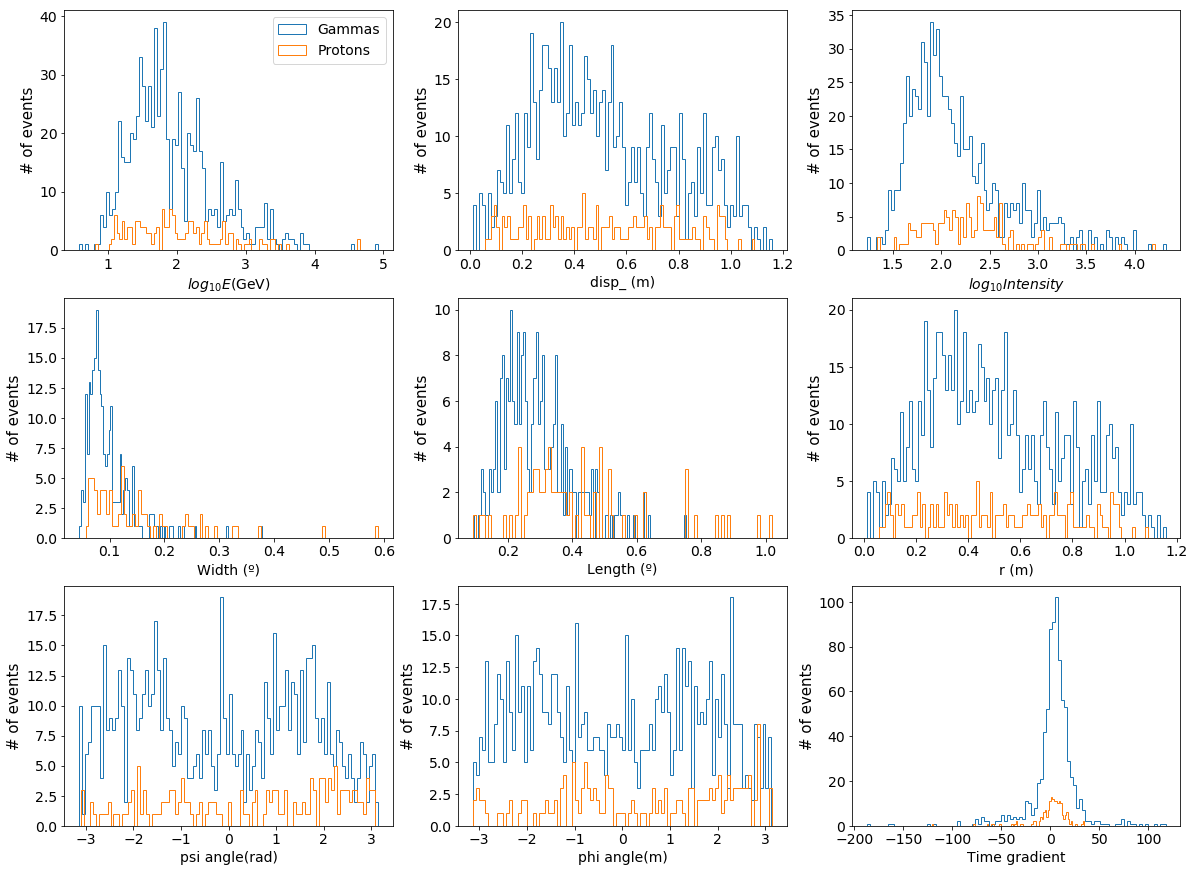

In [37]:
#Lets take a look to the results
lstplot.plot_features(data_dl2)

<font size="4">
**Energy reconstruction**

0.09856435356902216 0.6137690435379151


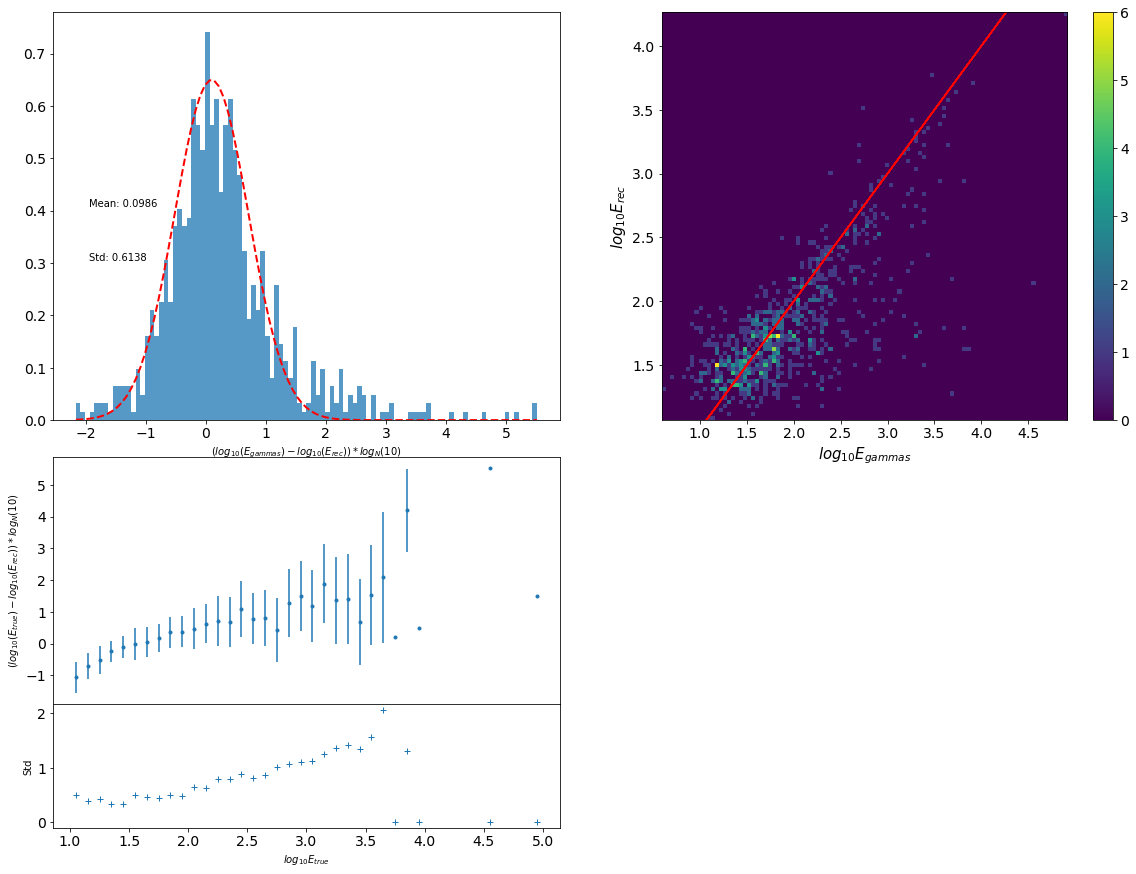

In [38]:
lstplot.plot_e(data_dl2)

<font size="4">
**Disp reconstruction**

0.08472789618800787 0.24503858392238181


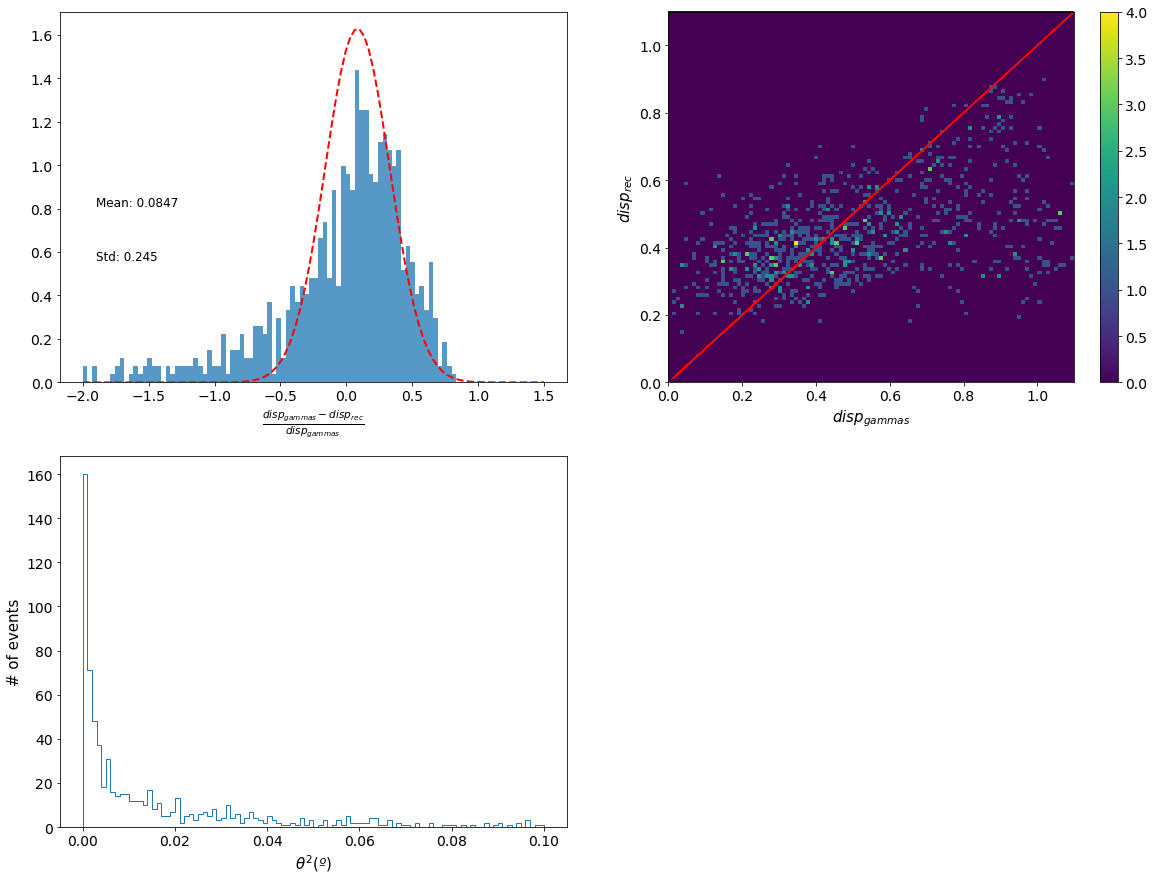

In [39]:
lstplot.plot_disp(data_dl2)

<font size="4">
**Reconstructed source position in camera coordinates**

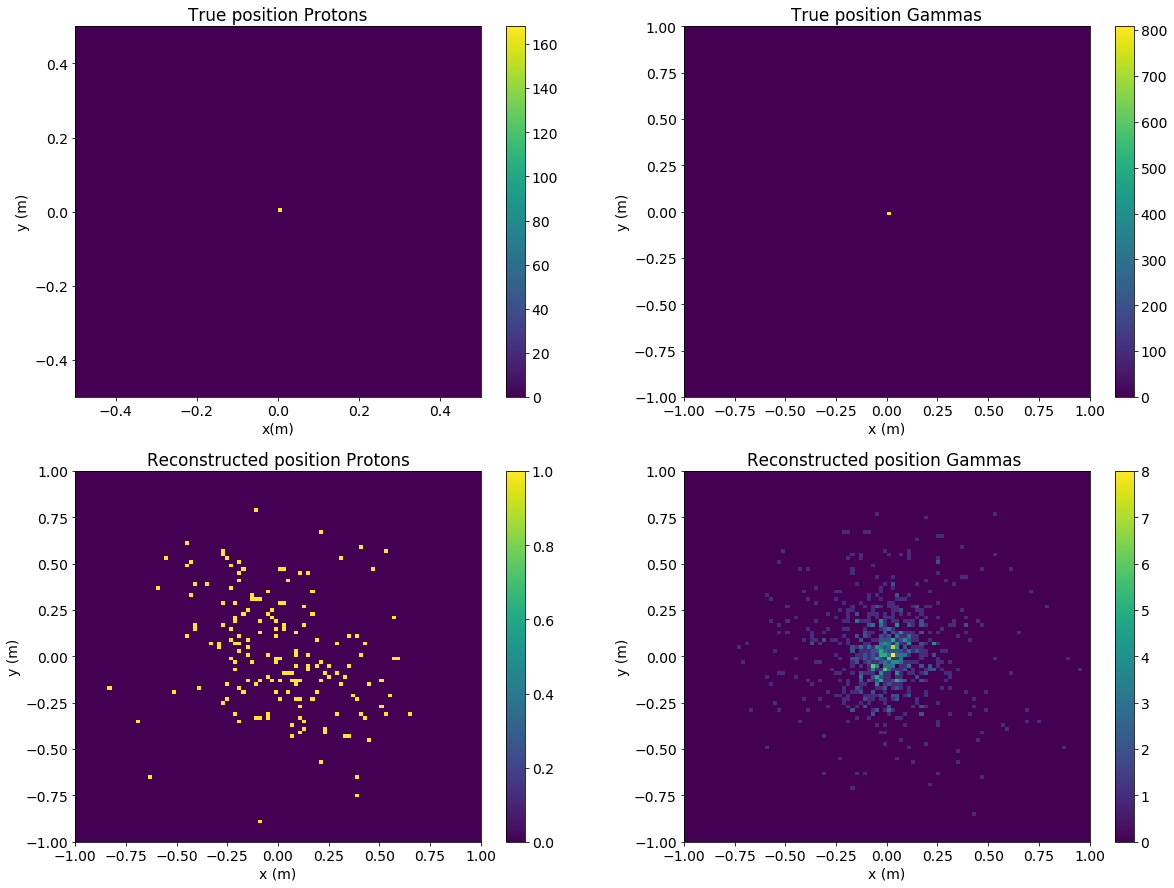

In [40]:
lstplot.plot_pos(data_dl2)

In [ ]:
<font size="4">
**RHadroness**

Text(0.5,0,'Hadroness')

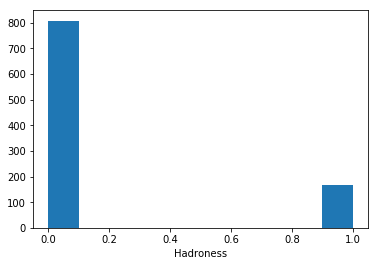

In [47]:
plt.hist(data_dl2['hadro_rec'])
plt.xlabel('Hadroness')